<a href="https://colab.research.google.com/github/Muhdhammad/yolo11-object-detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [ ]:
!nvidia-smi

Wed Jun 18 16:27:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import userdata

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('API'))
project = rf.workspace("object-detection-z0ulb").project("dataset-tm1an")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/dataset-2'

In [ ]:
model = YOLO("yolo11n.pt")

train_results = model.train(
    data="/content/dataset-2/data.yaml",
    epochs=50,
    imgsz=640,
    device="cuda"
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.5MB/s]


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 944.9±483.9 MB/s, size: 60.1 KB)


train: Scanning /content/dataset-2/train/labels... 356 images, 0 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<00:00, 2545.49it/s]

train: New cache created: /content/dataset-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 479.6±303.1 MB/s, size: 39.9 KB)


val: Scanning /content/dataset-2/valid/labels... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 1188.73it/s]

val: New cache created: /content/dataset-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.42G      1.606      3.269      1.896         12        640: 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         84         85    0.00331      0.927      0.467      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.8G      1.471      2.574      1.748         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]


                   all         84         85    0.00373       0.72      0.305      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.82G      1.531      2.416      1.821          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         84         85      0.232      0.436      0.257     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.84G      1.544      2.182       1.81          8        640: 100%|██████████| 23/23 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         84         85      0.275       0.25      0.265     0.0926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.86G      1.627      2.146      1.853         10        640: 100%|██████████| 23/23 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         84         85      0.344      0.297      0.227     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.87G      1.551       2.14      1.774          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         84         85      0.329      0.207      0.191     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.88G      1.599      2.071      1.843          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         84         85      0.316      0.443      0.225     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.9G      1.614       1.94       1.84          9        640: 100%|██████████| 23/23 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         84         85      0.334      0.328      0.248      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.91G      1.614      1.871      1.831         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         84         85      0.494      0.367      0.371       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.93G      1.568      1.841      1.821          8        640: 100%|██████████| 23/23 [00:05<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         84         85      0.656      0.671      0.705      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.94G      1.596      1.838      1.799         11        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         84         85      0.588      0.721      0.649      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.96G       1.65        1.8      1.868          8        640: 100%|██████████| 23/23 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         84         85       0.63      0.729      0.705       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.97G      1.494      1.552      1.717         10        640: 100%|██████████| 23/23 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]


                   all         84         85      0.713      0.553      0.671      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.99G      1.482      1.586      1.723          6        640: 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         84         85      0.744      0.754      0.776      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         3G       1.46      1.524      1.665         10        640: 100%|██████████| 23/23 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         84         85      0.603      0.808      0.687      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.02G      1.426      1.498      1.686          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         84         85      0.756      0.815      0.785      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.03G      1.459      1.417      1.687          9        640: 100%|██████████| 23/23 [00:05<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         84         85      0.853       0.74      0.851      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.05G      1.413      1.344      1.679          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         84         85       0.91      0.864      0.935       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.05G      1.447      1.354       1.68          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         84         85      0.856      0.721      0.834      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.08G      1.437      1.331      1.643         14        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         84         85      0.845      0.802      0.889      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.09G      1.409      1.348      1.684          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         84         85      0.854      0.847      0.904      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.11G      1.359      1.228      1.628         10        640: 100%|██████████| 23/23 [00:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         84         85      0.961      0.724      0.887       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.11G      1.364      1.288      1.646          7        640: 100%|██████████| 23/23 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         84         85      0.827      0.919      0.912      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.13G      1.341      1.195       1.59          4        640: 100%|██████████| 23/23 [00:05<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         84         85      0.906      0.823      0.896      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.15G      1.329      1.139      1.576          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         84         85      0.876      0.818      0.905      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.17G      1.287      1.121       1.53          9        640: 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         84         85      0.945      0.904      0.955       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.17G      1.329      1.139      1.593          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         84         85       0.96      0.916      0.936      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.2G      1.263      1.067      1.528         11        640: 100%|██████████| 23/23 [00:05<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         84         85      0.857      0.851      0.915      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.21G      1.268      1.096      1.539          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         84         85      0.976        0.9      0.966      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.23G      1.275       1.05      1.556         10        640: 100%|██████████| 23/23 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         84         85      0.944       0.91      0.939      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.23G      1.268      1.014      1.506          8        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         84         85      0.951      0.856      0.935      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.25G      1.199          1      1.482          6        640: 100%|██████████| 23/23 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         84         85      0.928      0.879      0.925      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.27G      1.211     0.9753      1.502          8        640: 100%|██████████| 23/23 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         84         85      0.925      0.926      0.952      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.28G      1.197     0.9689      1.472          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         84         85      0.961      0.937      0.953      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.29G      1.226      1.018      1.496          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         84         85       0.96      0.928      0.958      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.31G      1.202     0.9803      1.508          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         84         85      0.978      0.941       0.97      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.33G      1.182     0.9385      1.458         13        640: 100%|██████████| 23/23 [00:05<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         84         85      0.976      0.941      0.973      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.34G      1.157     0.8997      1.458          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         84         85      0.932      0.903      0.958       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.35G      1.158       0.95       1.47         10        640: 100%|██████████| 23/23 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         84         85       0.96      0.916      0.949      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.37G      1.108     0.8724      1.423          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         84         85      0.959      0.944      0.966      0.602


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.39G      1.106     0.8617      1.536          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         84         85      0.956      0.928      0.964      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.4G      1.101     0.7743      1.568          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         84         85      0.953      0.907      0.939      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.41G      1.055     0.7124      1.472          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         84         85      0.954      0.913       0.95      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.43G      1.081     0.6988      1.507          5        640: 100%|██████████| 23/23 [00:05<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         84         85      0.924      0.941      0.959      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.45G      1.059     0.6896      1.483          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         84         85      0.926      0.929      0.948      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.46G     0.9936     0.6757      1.434          4        640: 100%|██████████| 23/23 [00:05<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         84         85      0.967      0.917      0.967      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.47G     0.9393     0.6574      1.372          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         84         85      0.947      0.931      0.972      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.49G     0.9737     0.6352      1.416          4        640: 100%|██████████| 23/23 [00:05<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         84         85      0.961      0.932      0.971      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.5G     0.9402       0.66      1.404          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         84         85      0.973       0.94      0.969      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.52G     0.9205     0.6121      1.359          4        640: 100%|██████████| 23/23 [00:05<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         84         85      0.983      0.936      0.972      0.626



50 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


                   all         84         85      0.983      0.936      0.972      0.626
                  Brid         43         44      0.966      0.955      0.976       0.59
                 drone         41         41          1      0.918      0.968      0.661
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
metrics = model.val()

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 962.6±286.5 MB/s, size: 33.6 KB)


val: Scanning /content/dataset-2/valid/labels.cache... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]


                   all         84         85      0.983      0.936      0.972      0.626
                  Brid         43         44      0.966      0.955      0.976       0.59
                 drone         41         41          1      0.918      0.968      0.663
Speed: 1.9ms preprocess, 10.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


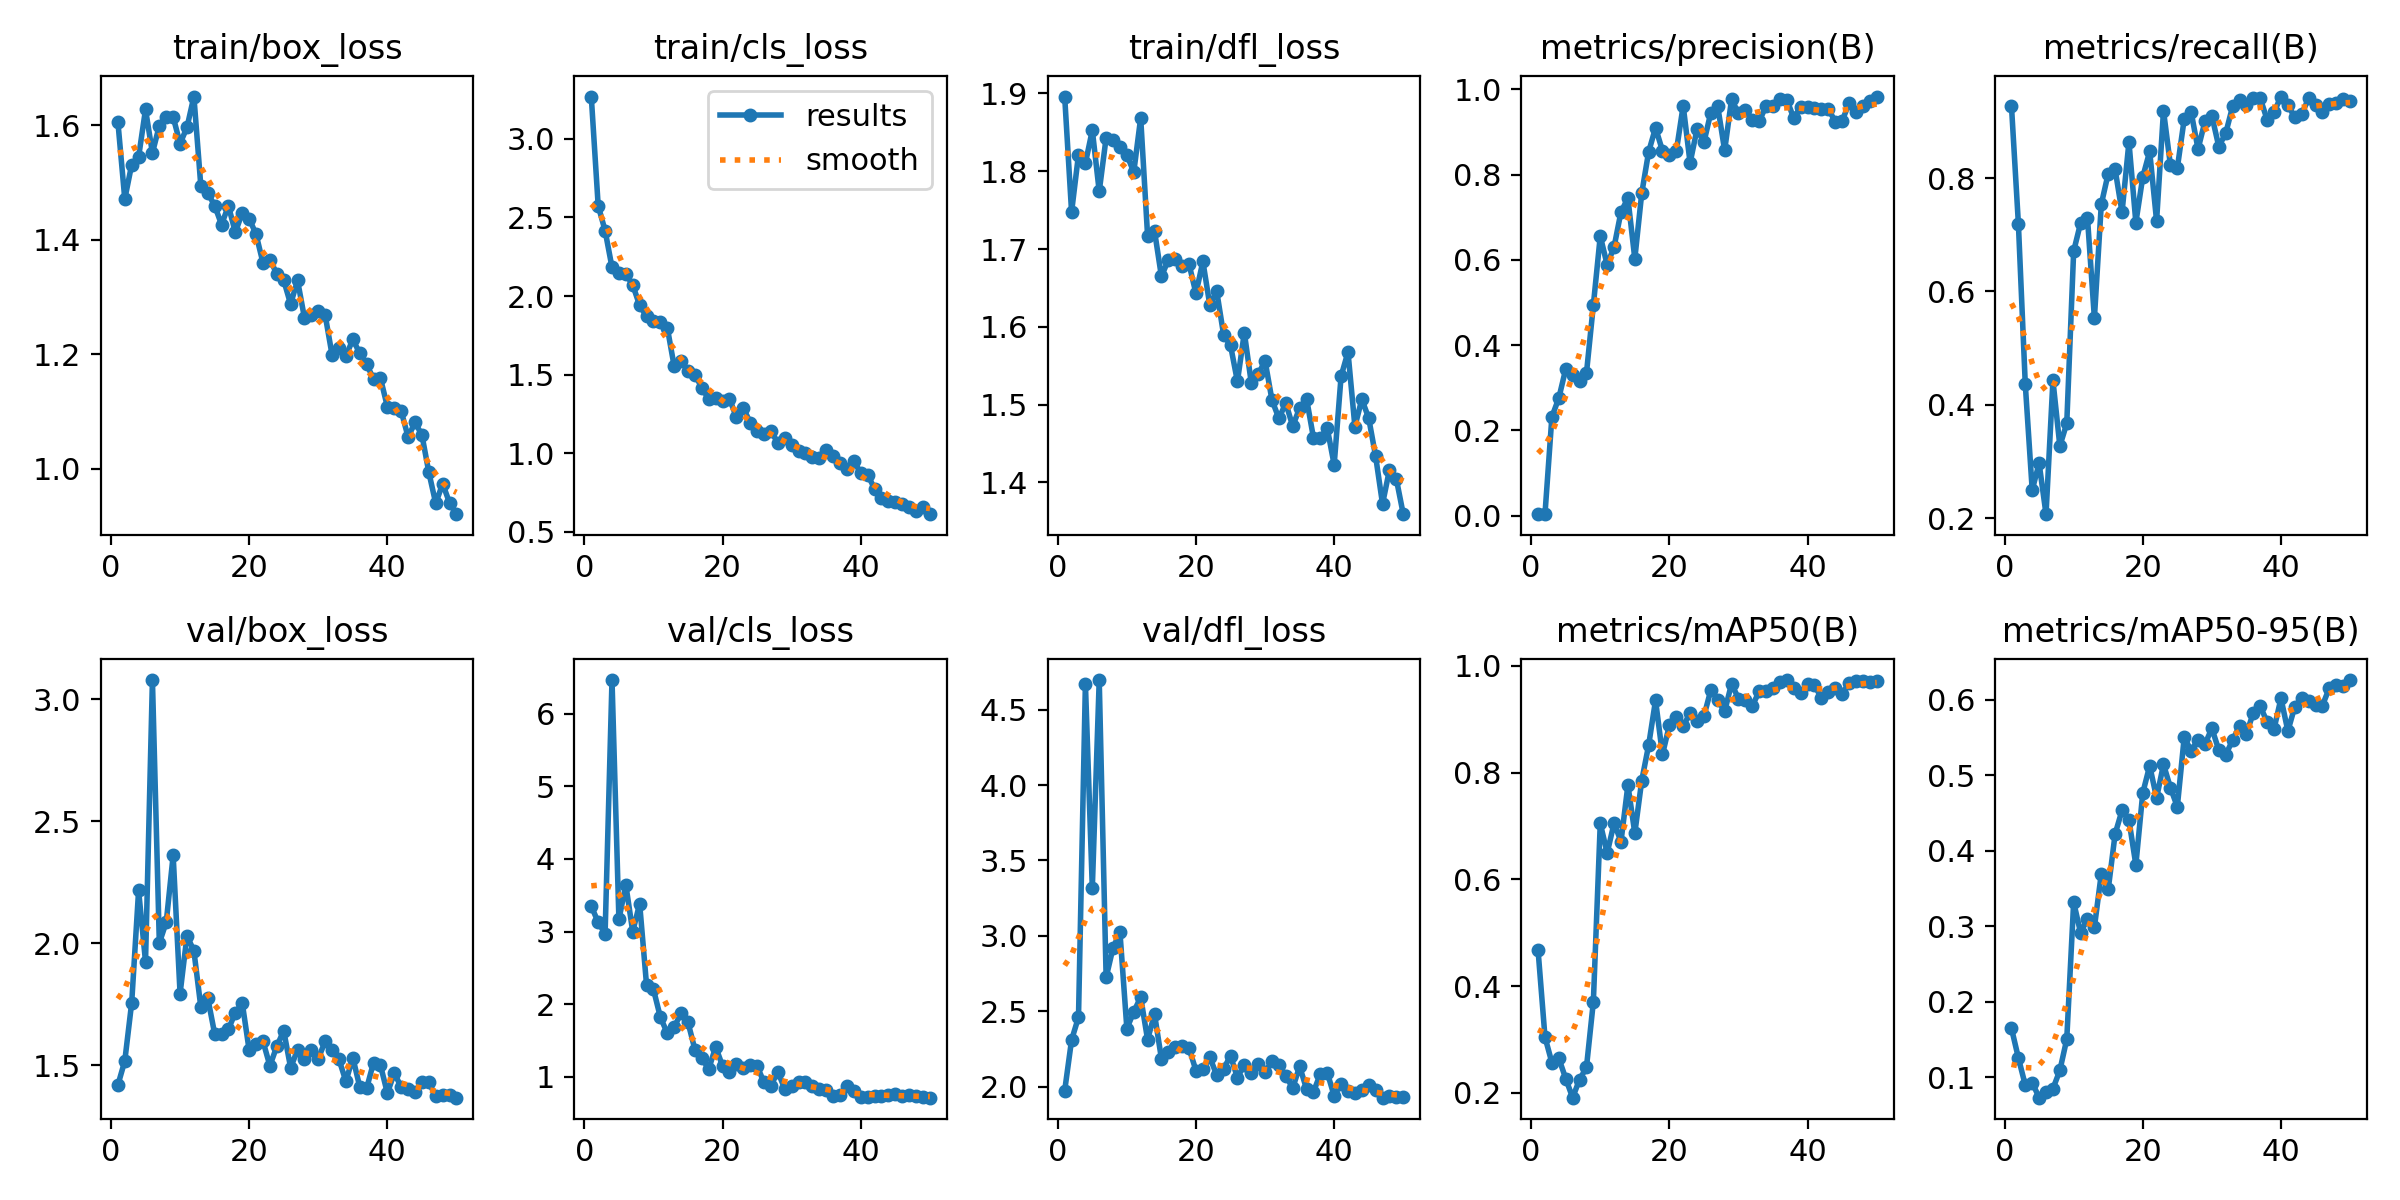

In [ ]:
from IPython.display import Image

Image("/content/runs/detect/train/results.png", height=400, width=800)

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/33 /content/dataset-2/test/images/0002_jpg.rf.ccca3c2062a7f7d7e5843f10ef67ab8e.jpg: 640x640 1 drone, 13.1ms
image 2/33 /content/dataset-2/test/images/0114_jpg.rf.e349c321ac198a37a1b519b3417143b8.jpg: 640x640 1 drone, 8.8ms
image 3/33 /content/dataset-2/test/images/0146_jpg.rf.c55779609360e90527d560233777c202.jpg: 640x640 1 drone, 9.8ms
image 4/33 /content/dataset-2/test/images/0209_jpg.rf.44d73857e981dfb0138548db2750db87.jpg: 640x640 1 drone, 8.3ms
image 5/33 /content/dataset-2/test/images/0222_jpg.rf.388294aa2ac77ed2403fd27e5543e9a0.jpg: 640x640 1 drone, 8.3ms
image 6/33 /content/dataset-2/test/images/0234_jpg.rf.4600c8299294cc7f6f636095e4213abe.jpg: 640x640 1 drone, 8.2ms
image 7/33 /content/dataset-2/test/images/024_jpg.rf.b8e85df0678c4231ab2413dcf13a3437.jpg: 640x640 1 drone, 8.6ms
image 8/33 /content/dataset-

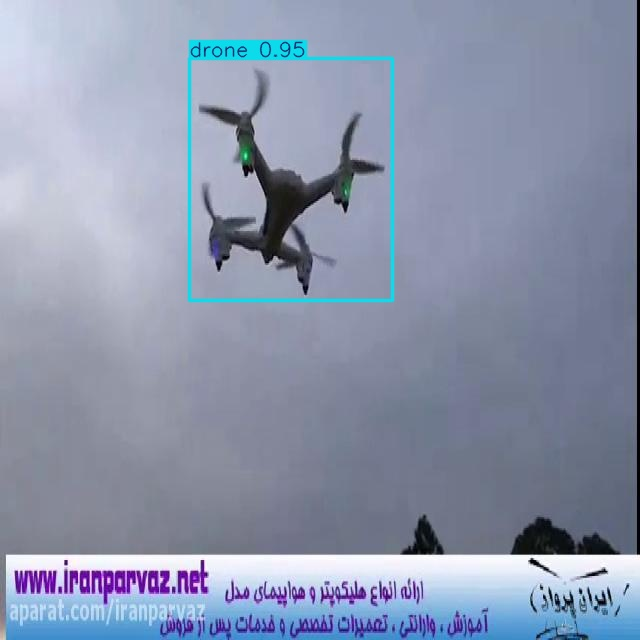

In [ ]:
Image("/content/runs/detect/predict/043_jpg.rf.553c73ecf035d5a5d7e79a4dc791b2b1.jpg", height=500, width=500)

In [ ]:
img = "/content/drone-pexels.jpeg"

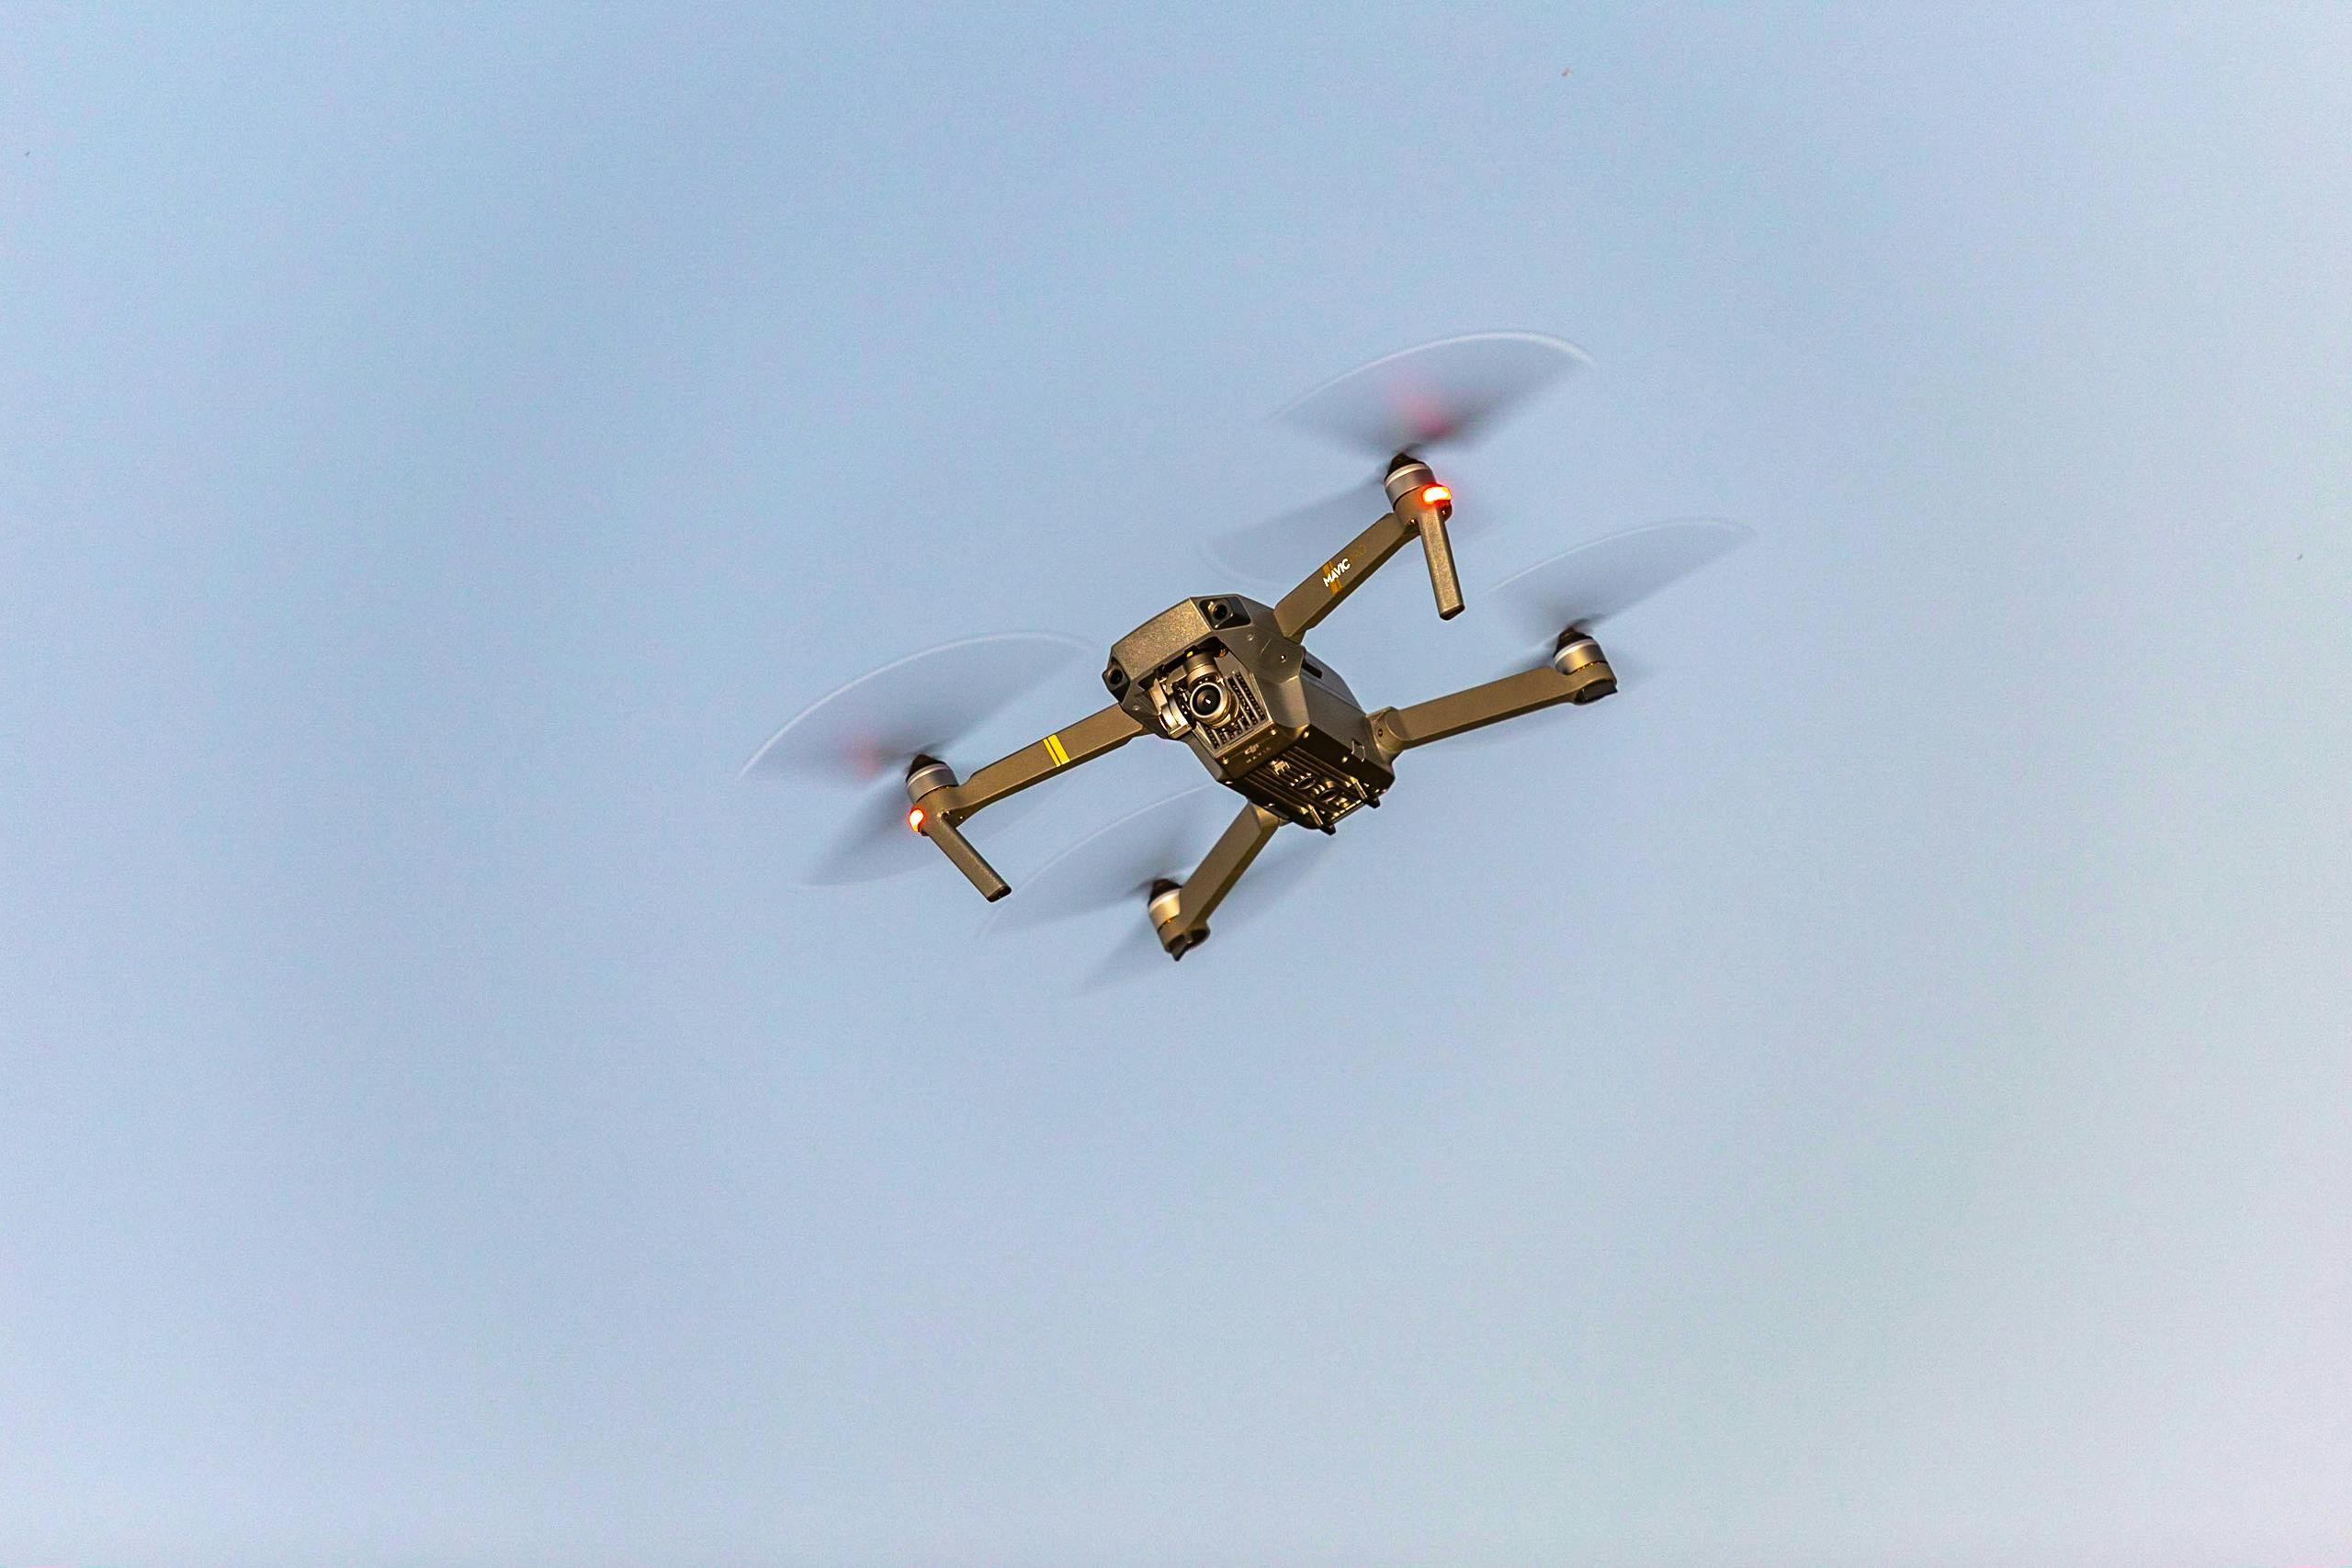

In [ ]:
Image(img, height=500, width=500)

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/drone-pexels.jpeg" save=True

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/drone-pexels.jpeg: 448x640 1 drone, 41.6ms
Speed: 3.5ms preprocess, 41.6ms inference, 173.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


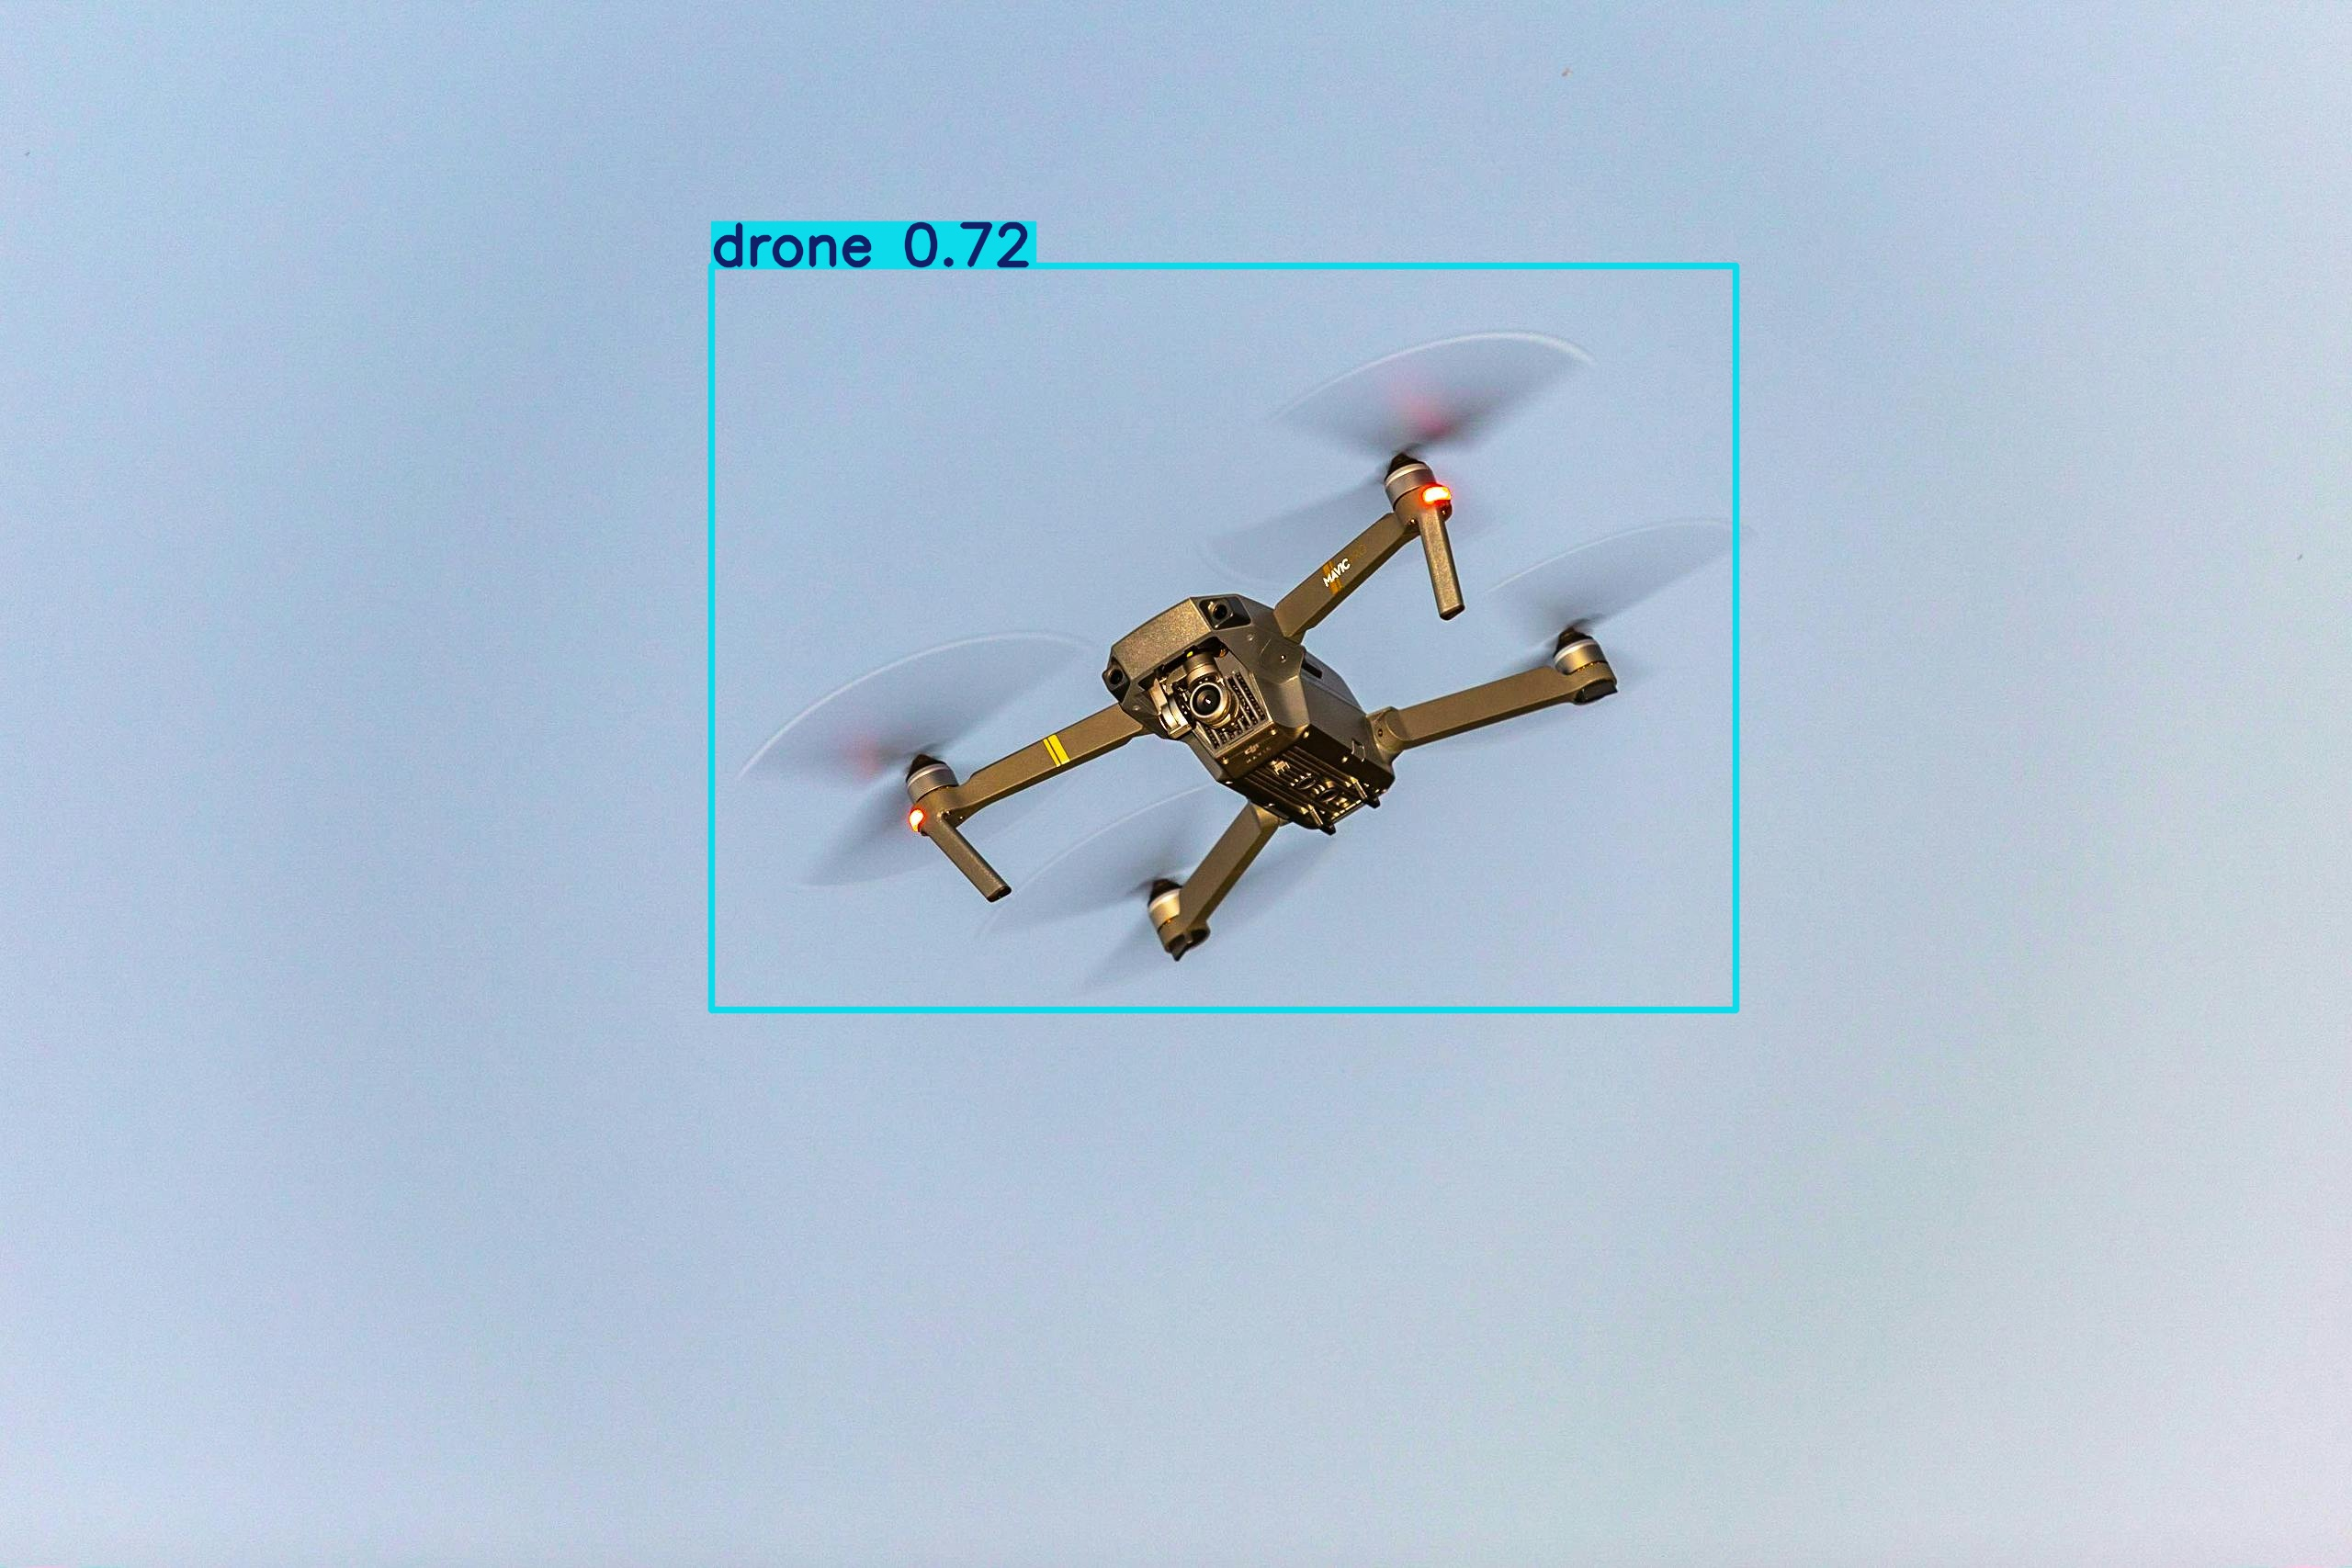

In [ ]:
Image("/content/runs/detect/predict2/drone-pexels.jpg", height=500, width=500)

test video
https://www.vecteezy.com/video/63231588-drone-flying-over-green-fields

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/vecteezy_drone-flying-over-green-fields.mp4" save=True

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 43.7ms
video 1/1 (frame 2/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 14.8ms
video 1/1 (frame 3/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 13.3ms
video 1/1 (frame 4/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 14.8ms
video 1/1 (frame 5/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 6/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 (no detections), 13.9ms
video 1/1 (frame 7/534) /content/vecteezy_drone-flying-over-green-fields.mp4: 384x640 1 drone, 17.7ms
video 1/1 (frame 8/534) /content/vecteezy_drone-flying-over-green-field

In [ ]:
# Download the video to see result

from google.colab import files
files.download("/content/runs/detect/predict3/vecteezy_drone-flying-over-green-fields.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Export the model
model.export(format="onnx", dynamic=True)